# Segmentos y Churn de Hotel VIP

## Objetivo:

Como dueño de un hotel famoso y con muchas transacciones, registro comercial pendiente a confirmar, deseo saber cuales son mis segmentos de clientes y que segmento es el que tiene mayor perdida porcentual de clientes.


## Datos:

- tlacuachitos_vip_transactions.csv
- tlacuachitos_vip_customers_data.csv

## Actividad 1)
- Elabora y explica segmentos de clientes que podría usar para realizar mi dirección estratégica.

## Actividad 2)
- Calcula y obtén el porcentaje de clientes perdidos que tengo en cada segmento

In [11]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(working_memory=1024)

In [28]:
transactions = pd.read_csv('tlacuachitos_vip_transactions.csv')
customers = pd.read_csv('tlacuachitos_vip_customers_data.csv')
cluster_data = customers.drop(['Churn_Risk', 'Cohort', 'CustomerID'], axis=1)

In [29]:
customers.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31


In [30]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1143 non-null   int64  
 1   Age                  1143 non-null   int64  
 2   Income               1143 non-null   float64
 3   Tenure               1143 non-null   int64  
 4   Education            1143 non-null   object 
 5   Industry             1143 non-null   object 
 6   Geographic Location  1143 non-null   object 
 7   Churn_Risk           1143 non-null   int64  
 8   Cohort               1143 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 80.5+ KB


In [31]:
# Convertir variables categóricas en variables dummies
categorical_features = ['Education', 'Industry', 'Geographic Location']
data_encoded = pd.get_dummies(cluster_data, columns=categorical_features, drop_first=True)
data_encoded.head()

,Age,Income,Tenure,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America
0,56,52752.677346,3,False,True,False,False,False,False,True,False,True,False,False
1,69,55297.364348,6,False,False,False,False,False,False,True,False,False,False,True
2,46,57978.753383,3,False,False,False,False,True,False,False,False,True,False,False
3,32,60445.266900,3,True,False,False,False,False,False,False,False,False,False,True
4,60,57741.870929,5,False,False,False,True,False,False,False,False,False,False,False


In [32]:
# Preparar los datos seleccionando características relevantes y normalizándolos
features = ['Age', 'Income', 'Tenure'] + list(data_encoded.columns[4:])  # Incluir características categóricas codificadas
x = data_encoded.loc[:, features].values
x = StandardScaler().fit_transform(x)  # Normalización de las características

C:\Users\epile\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\epile\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\epile\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\epile\AppData\Ro

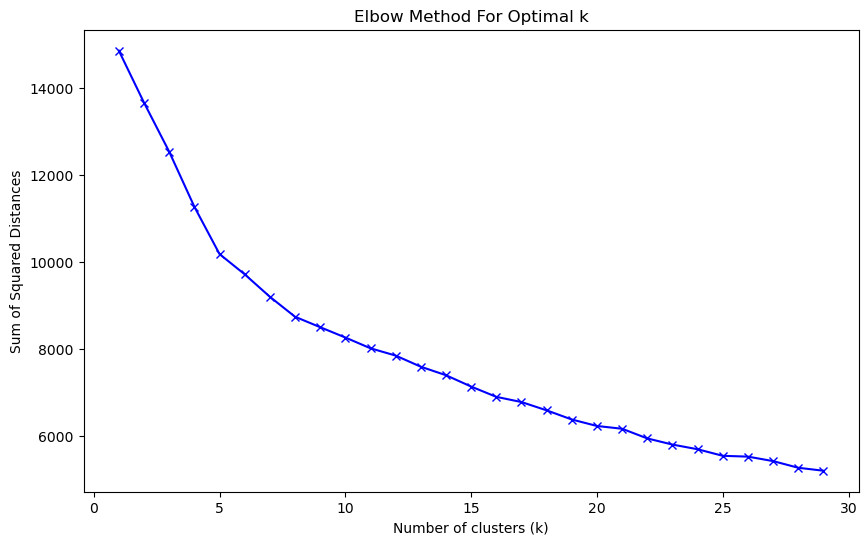

In [33]:
# Determinar el número óptimo de clusters usando el método del codo
sum_of_squared_distances = []
K = range(1, 30)  # Ajuste el rango según sea necesario
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(x)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Decido usar 5 Clusters

In [115]:
# Aplicar K-means clustering para identificar segmentos de clientes
kmeans = KMeans(n_clusters=5, random_state=42) 
labels = kmeans.fit_predict(x)

# Agregar las etiquetas del cluster al DataFrame original para análisis
data_encoded['Cluster'] = labels
data_encoded.head()

C:\Users\epile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\epile\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


,Age,Income,Tenure,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America,Cluster
0,56,52752.677346,3,False,True,False,False,False,False,True,False,True,False,False,0
1,69,55297.364348,6,False,False,False,False,False,False,True,False,False,False,True,0
2,46,57978.753383,3,False,False,False,False,True,False,False,False,True,False,False,3
3,32,60445.266900,3,True,False,False,False,False,False,False,False,False,False,True,1
4,60,57741.870929,5,False,False,False,True,False,False,False,False,False,False,False,2


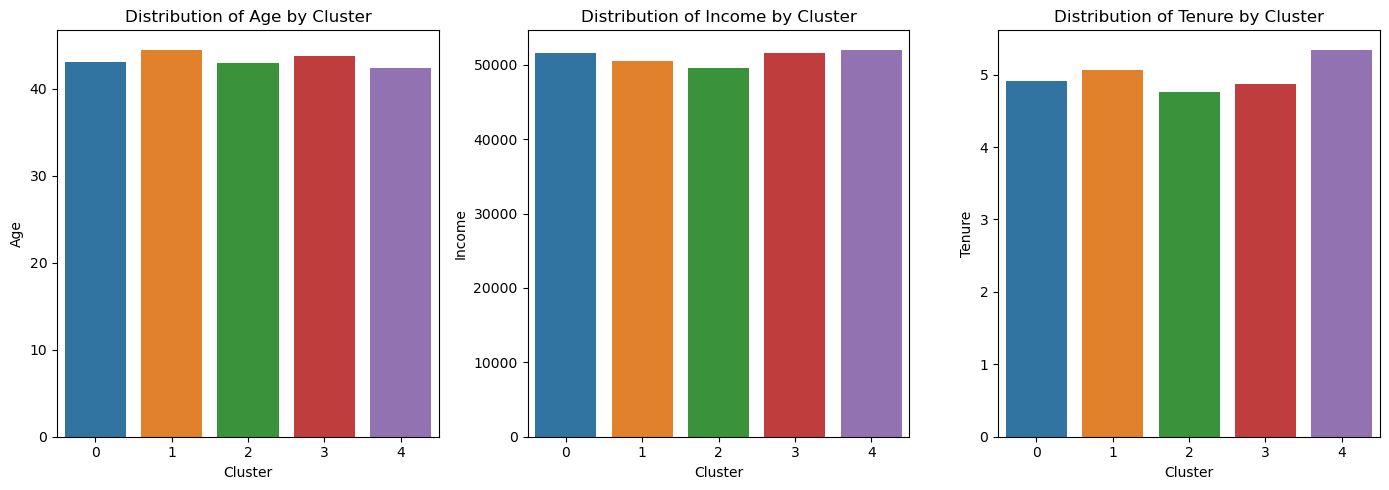

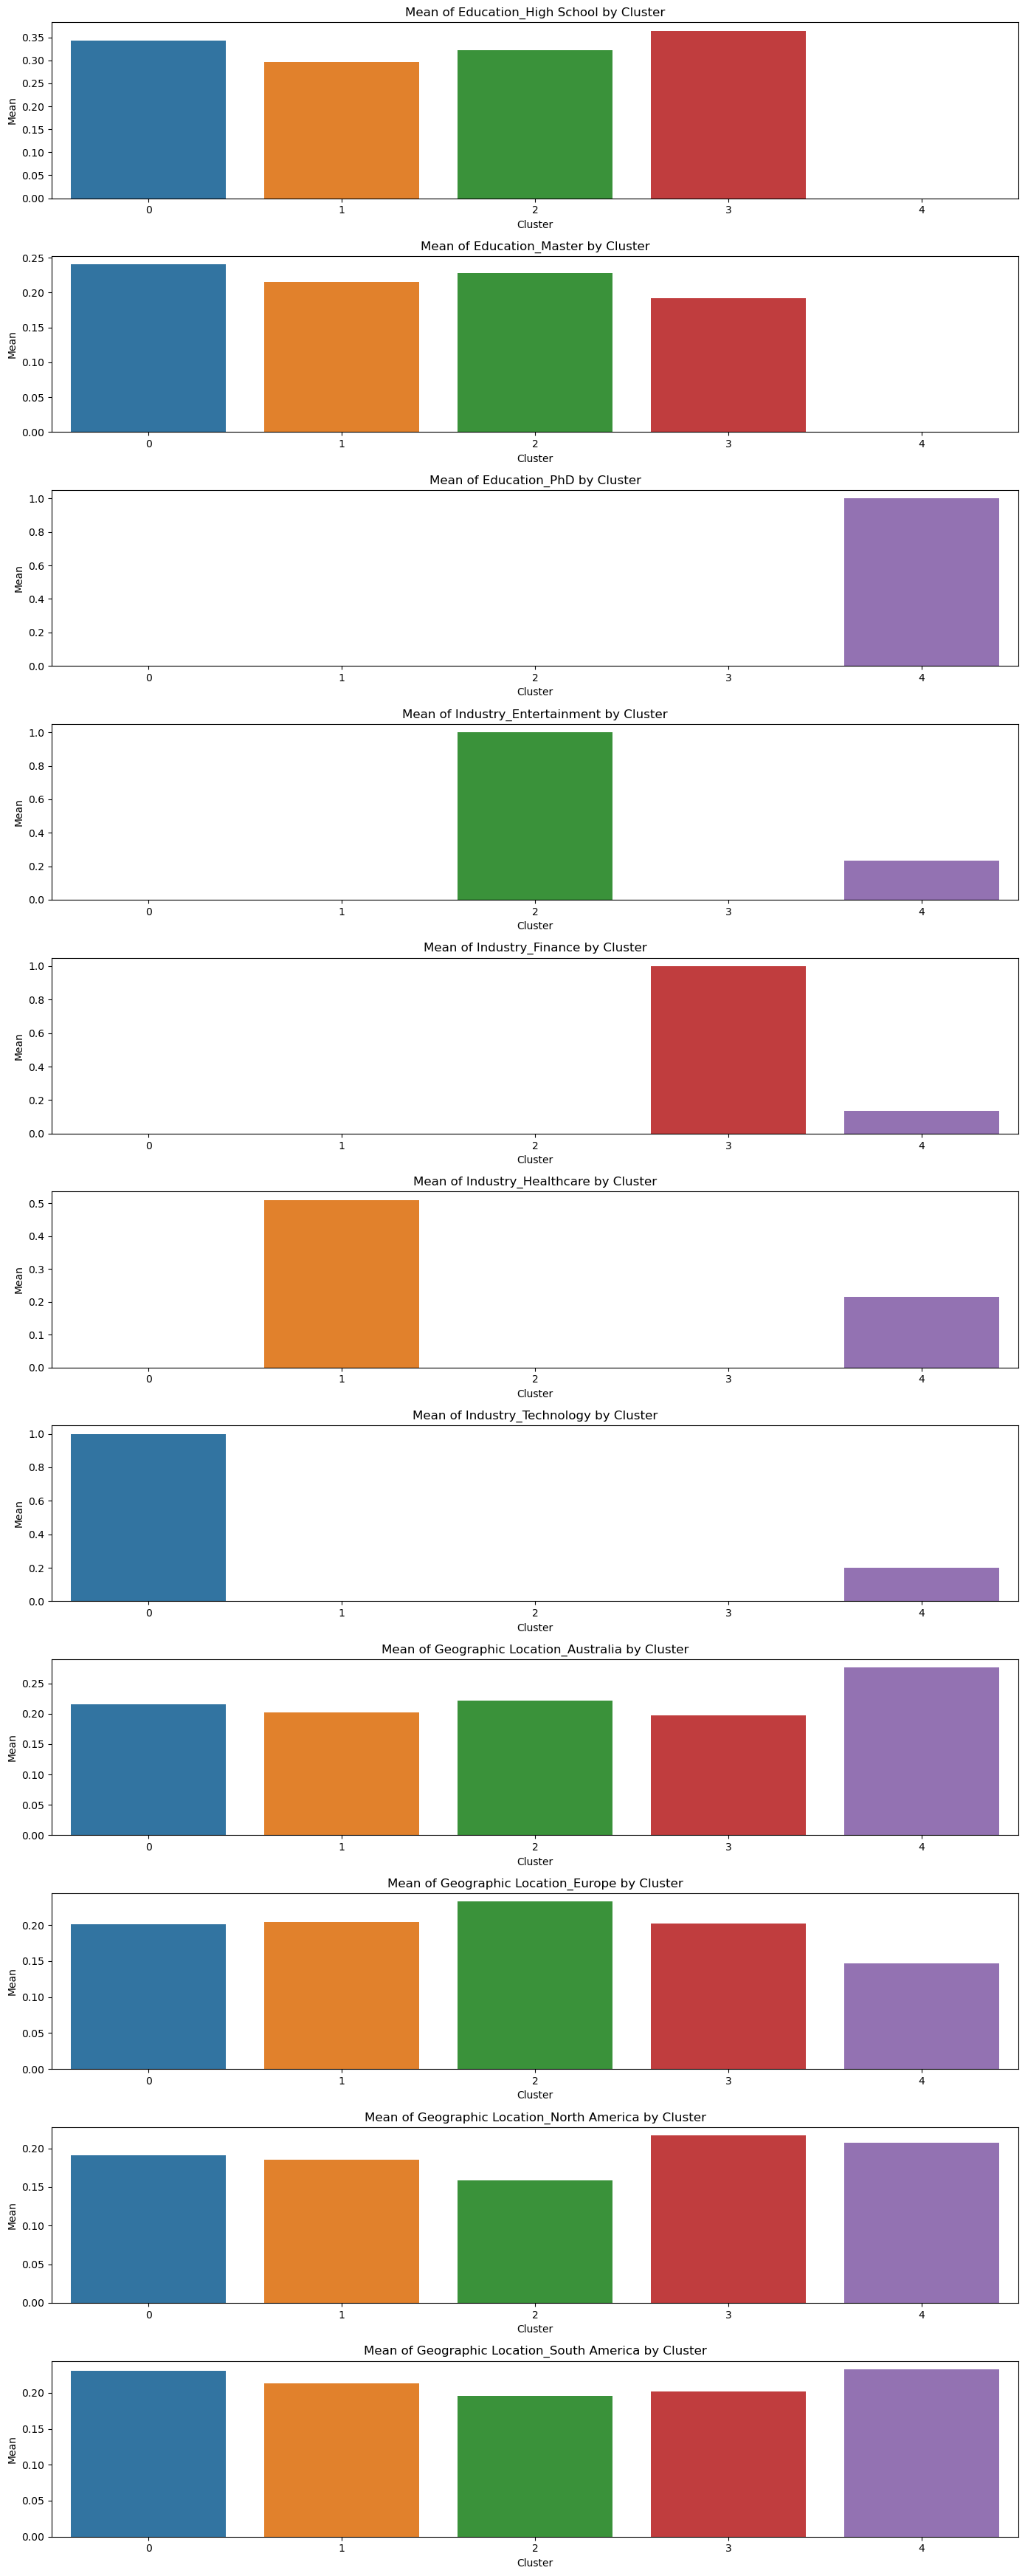

In [116]:
def summarize_clusters(data):
    numerical_features = ['Age', 'Income', 'Tenure'] 
    categorical_features = [col for col in data.columns if col.startswith('Education_') or col.startswith('Industry_') or col.startswith('Geographic Location_') or col.startswith('time_')]

    # Summary DataFrame for numerical features
    cluster_summary_numerical = data.groupby('Cluster')[numerical_features].mean()
    
    # Summary DataFrame for categorical features
    cluster_summary_categorical = data.groupby('Cluster')[categorical_features].mean()

    return cluster_summary_numerical, cluster_summary_categorical

# Generate the summary for each cluster
cluster_summary_numerical, cluster_summary_categorical = summarize_clusters(data_encoded)

# Plotting
def plot_cluster_summary(cluster_summary_numerical, cluster_summary_categorical):
    # Plot numerical summaries
    fig, axes = plt.subplots(nrows=1, ncols=len(cluster_summary_numerical.columns), figsize=(14, 5))
    for i, col in enumerate(cluster_summary_numerical.columns):
        sns.barplot(x=cluster_summary_numerical.index, y=col, data=cluster_summary_numerical, ax=axes[i])
        axes[i].set_title(f'Distribution of {col} by Cluster')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel(col)

    plt.tight_layout()
    plt.show()

    # Plot categorical summaries
    fig, axes = plt.subplots(nrows=len(cluster_summary_categorical.columns), ncols=1, figsize=(14, 35))
    for i, col in enumerate(cluster_summary_categorical.columns):
        sns.barplot(x=cluster_summary_categorical.index, y=col, data=cluster_summary_categorical, ax=axes[i])
        axes[i].set_title(f'Mean of {col} by Cluster')
        axes[i].set_xlabel('Cluster')
        axes[i].set_ylabel('Mean')

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_cluster_summary(cluster_summary_numerical, cluster_summary_categorical)

## Explicación de Clústeres

- **Clester 1:** Es el segmento que pertenece a la industria de Tecnología
- **Cluster 2:** Es el segmento que pertenece a la industria de Salud
- **Cluster 3:** Es el segmento que pertenece a la industria de Entretenimiento
- **Cluster 4:** Es el segmento que pertenece a la industria de Finanzas
- **Cluster 5:** Es el segmento que pertenece a los que tienen educación de PHD 

## Churn Rate

In [82]:
transactions.head()

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-07-31,353.796197
2,1,2024-01-31,38.206591
3,1,2024-06-30,724.929423
4,2,2022-02-28,145.616000


In [83]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4346 non-null   int64  
 1   TransactionDate    4346 non-null   object 
 2   TransactionAmount  4346 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.0+ KB


In [85]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions.sort_values(by=['CustomerID', 'TransactionDate'])
transactions.head()

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-07-31,353.796197
2,1,2024-01-31,38.206591
3,1,2024-06-30,724.929423
4,2,2022-02-28,145.616000


In [87]:
transactions_total = transactions.groupby(['CustomerID', 'TransactionDate'])['TransactionAmount'].sum().reset_index()
transactions_total.head()

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-01-31,38.206591
2,1,2024-06-30,724.929423
3,1,2024-07-31,353.796197
4,2,2022-02-28,145.616000


In [88]:
# Cuantos retornos exísten
sum(transactions_total['TransactionAmount'] < 0)

0

In [90]:
transactions_total_clean = transactions_total[transactions_total['TransactionAmount'] > 0].copy()

In [91]:
snapshot_date = transactions_total_clean['TransactionDate'].max() 
snapshot_date

Timestamp('2024-08-31 00:00:00')

In [93]:
transactions_total_clean['TransactionDate'].min() 

Timestamp('2018-01-31 00:00:00')

In [94]:
# Calculate days between purchases
transactions_total_clean['DaysBetweenPurchases'] = transactions_total_clean.groupby(['CustomerID'])['TransactionDate'].diff().dt.days
transactions_total_clean.head()

,CustomerID,TransactionDate,TransactionAmount,DaysBetweenPurchases
0,1,2023-10-31,518.444092,NaN
1,1,2024-01-31,38.206591,92.0
2,1,2024-06-30,724.929423,151.0
3,1,2024-07-31,353.796197,31.0
4,2,2022-02-28,145.616000,NaN


### Threshhold del churn

In [97]:
general_threshold = transactions_total_clean['DaysBetweenPurchases'].quantile(0.95)
general_threshold

579.0

In [99]:
transactions_total_clean.head()

,CustomerID,TransactionDate,TransactionAmount,DaysBetweenPurchases
0,1,2023-10-31,518.444092,NaN
1,1,2024-01-31,38.206591,92.0
2,1,2024-06-30,724.929423,151.0
3,1,2024-07-31,353.796197,31.0
4,2,2022-02-28,145.616000,NaN


In [121]:
df1 = pd.merge(customers, data_encoded, on='Income', how='inner')
df2 = pd.merge(df1, transactions_total_clean, on='CustomerID', how='inner')
df2.head()

,CustomerID,Age_x,Income,Tenure_x,Education,Industry,Geographic Location,Churn_Risk,Cohort,Age_y,...,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America,Cluster,TransactionDate,TransactionAmount,DaysBetweenPurchases
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,56,...,False,True,False,True,False,False,0,2023-10-31,518.444092,NaN
1,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,56,...,False,True,False,True,False,False,0,2024-01-31,38.206591,92.0
2,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,56,...,False,True,False,True,False,False,0,2024-06-30,724.929423,151.0
3,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,56,...,False,True,False,True,False,False,0,2024-07-31,353.796197,31.0
4,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,69,...,False,True,False,False,False,True,0,2022-02-28,145.616000,NaN


## Churn por cluster

In [123]:
threshold_per_cluster = df2.groupby('Cluster')['DaysBetweenPurchases'].agg(
    percentile_95=lambda x: x.quantile(0.95),
    transaction_count='count'
).reset_index()

threshold_per_cluster.head()

,Cluster,percentile_95,transaction_count
0,0,560.2,553
1,1,579.0,1088
2,2,579.6,449
3,3,609.0,478
4,4,546.3,295


# Solución Profe

In [3]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import set_config
set_config(working_memory=1024)

In [4]:
df = pd.read_csv('tlacuachitos_vip_customers_data.csv')
df.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CustomerID           1143 non-null   int64  
 1   Age                  1143 non-null   int64  
 2   Income               1143 non-null   float64
 3   Tenure               1143 non-null   int64  
 4   Education            1143 non-null   object 
 5   Industry             1143 non-null   object 
 6   Geographic Location  1143 non-null   object 
 7   Churn_Risk           1143 non-null   int64  
 8   Cohort               1143 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 80.5+ KB


In [6]:
numerical_features = ['Age', 'Income', 'Tenure']
categorical_features = ['Education', 'Industry', 'Geographic Location']

In [7]:
encoded_features = pd.get_dummies(df[categorical_features],
                   columns=categorical_features, 
                   drop_first=True)
encoded_features.head()

,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America
0,False,True,False,False,False,False,True,False,True,False,False
1,False,False,False,False,False,False,True,False,False,False,True
2,False,False,False,False,True,False,False,False,True,False,False
3,True,False,False,False,False,False,False,False,False,False,True
4,False,False,False,True,False,False,False,False,False,False,False


In [8]:
data_to_model_standarized = StandardScaler().fit_transform(df[numerical_features])

data_to_model_df = pd.DataFrame(data_to_model_standarized,
                                columns=numerical_features).reset_index()

encoded_features_df = encoded_features.reset_index()

data_to_model = data_to_model_df.merge(encoded_features_df, on='index')
data_to_model = data_to_model.drop('index', axis=1)

data_to_model.head()

,Age,Income,Tenure,Education_High School,Education_Master,Education_PhD,Industry_Entertainment,Industry_Finance,Industry_Healthcare,Industry_Technology,Geographic Location_Australia,Geographic Location_Europe,Geographic Location_North America,Geographic Location_South America
0,0.824019,0.121621,-0.878889,False,True,False,False,False,False,True,False,True,False,False
1,1.688471,0.286515,0.451668,False,False,False,False,False,False,True,False,False,False,True
2,0.159056,0.460267,-0.878889,False,False,False,False,True,False,False,False,True,False,False
3,-0.771892,0.620095,-0.878889,True,False,False,False,False,False,False,False,False,False,True
4,1.090004,0.444917,0.008149,False,False,False,True,False,False,False,False,False,False,False


C:\Users\epile\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\epile\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\epile\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
C:\Users\epile\AppData\Ro

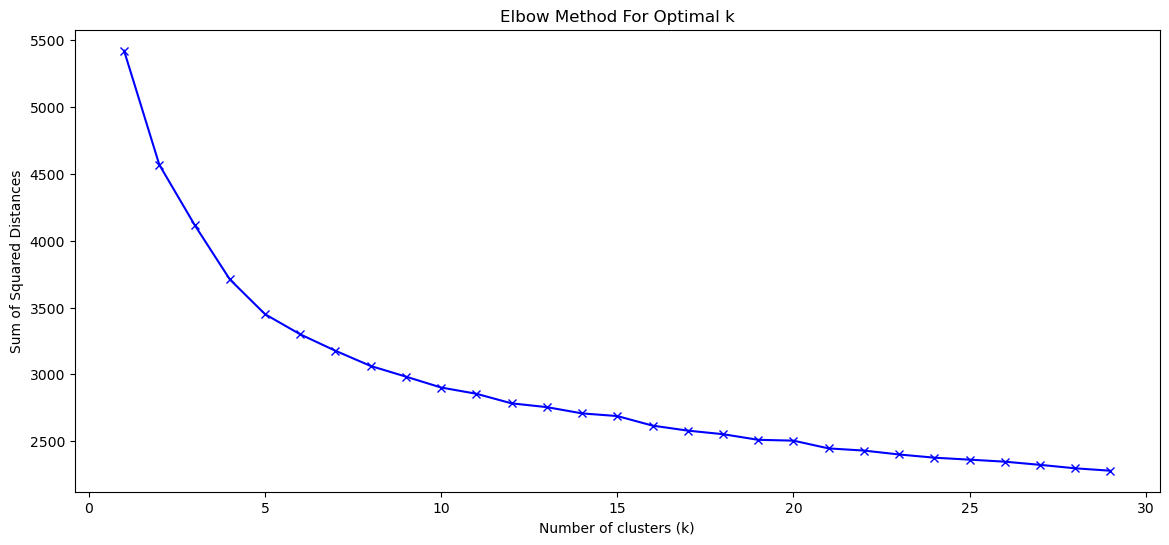

In [9]:
sum_of_squared_distances = []
K = range(1, 30)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(data_to_model)
    sum_of_squared_distances.append(km.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(14, 6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Se deciden 5 clusters

In [10]:
kmeans = KMeans(n_clusters=5, random_state=42)
labels = kmeans.fit_predict(data_to_model)
labels

C:\Users\epile\AppData\Roaming\jupyterlab-desktop\jlab_server\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(


array([4, 4, 4, ..., 1, 3, 3])

In [11]:
df['cluster'] = labels
df.head()

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,cluster
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31,4
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28,0
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31,4


In [12]:
def boxplot_clusters(col):
    sns.boxplot(x='cluster', y=col, data=df, hue='cluster')
    plt.show()

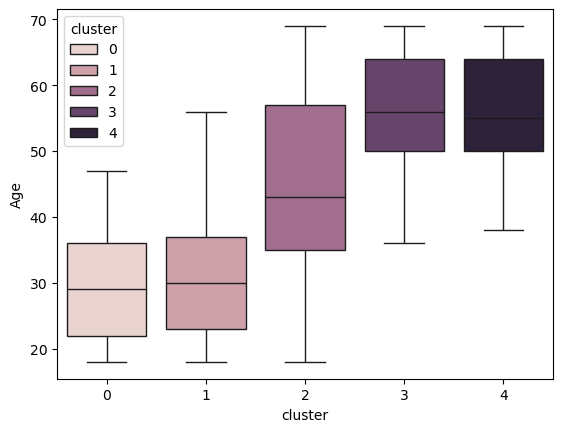

In [13]:
boxplot_clusters('Age')

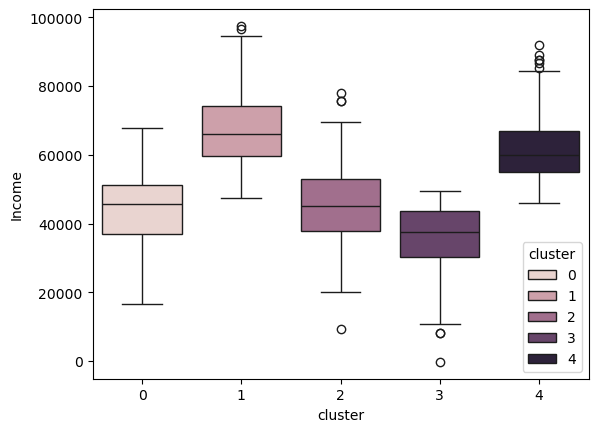

In [14]:
boxplot_clusters('Income')

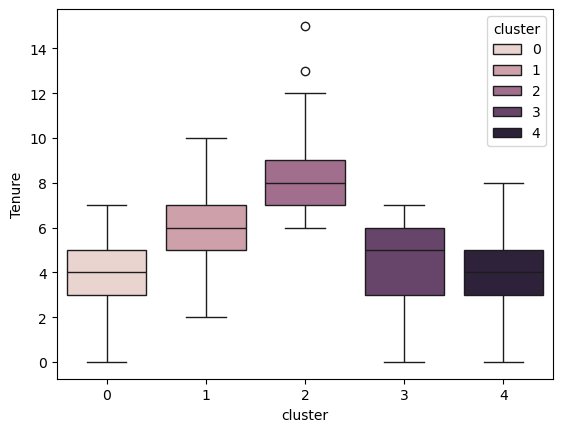

In [15]:
boxplot_clusters('Tenure')

In [36]:
def barplot_clusters(col):
    sns.countplot(x='Geographic Location', hue='cluster', data=df)
    plt.title('Count of Entries by Geographic Location')
    plt.legend(loc='best')
    plt.xlabel('Geographic Location')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

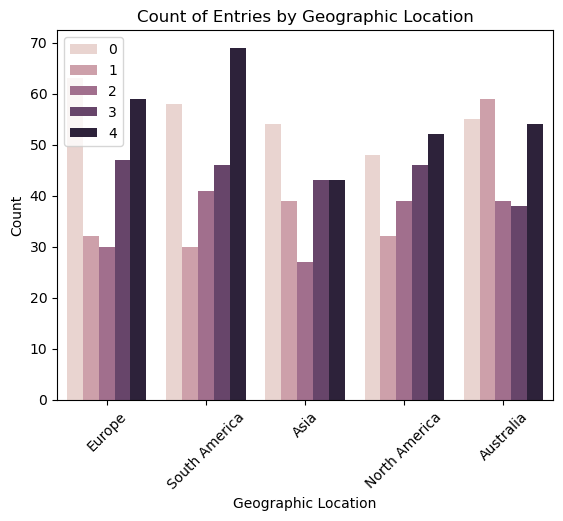

In [37]:
barplot_clusters('Geographic Location')

## Churn Rate

In [38]:
transactions = pd.read_csv('tlacuachitos_vip_transactions.csv')
transactions.head()

,CustomerID,TransactionDate,TransactionAmount
0,1,2023-10-31,518.444092
1,1,2024-07-31,353.796197
2,1,2024-01-31,38.206591
3,1,2024-06-30,724.929423
4,2,2022-02-28,145.616000


In [39]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         4346 non-null   int64  
 1   TransactionDate    4346 non-null   object 
 2   TransactionAmount  4346 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 102.0+ KB


In [40]:
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4346 entries, 0 to 4345
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   CustomerID         4346 non-null   int64         
 1   TransactionDate    4346 non-null   datetime64[ns]
 2   TransactionAmount  4346 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 102.0 KB


In [41]:
df

,CustomerID,Age,Income,Tenure,Education,Industry,Geographic Location,Churn_Risk,Cohort,cluster
0,1,56,52752.677346,3,Master,Technology,Europe,1,2023-08-31,4
1,2,69,55297.364348,6,Bachelor,Technology,South America,0,2021-08-31,4
2,3,46,57978.753383,3,Bachelor,Finance,Europe,1,2019-05-31,4
3,4,32,60445.266900,3,High School,Education,South America,1,2021-02-28,0
4,5,60,57741.870929,5,Bachelor,Entertainment,Asia,0,2018-10-31,4
...,...,...,...,...,...,...,...,...,...,...
1138,1139,26,45236.402018,8,Bachelor,Education,Europe,0,2019-12-31,2
1139,1140,51,39868.078327,9,Bachelor,Education,Asia,1,2022-10-31,2
1140,1141,29,57043.387540,5,High School,Finance,North America,0,2018-04-30,1
1141,1142,52,34901.585134,6,Bachelor,Healthcare,North America,0,2018-10-31,3


In [42]:
transactions = transactions.sort_values(by=['CustomerID', 'TransactionDate'])
df_master = transactions.merge(df[['CustomerID', 'cluster']], on='CustomerID')
df_master['DaysBetweenPurchase'] = df_master.groupby('CustomerID')['TransactionDate'].diff().dt.days
df_master.head()

,CustomerID,TransactionDate,TransactionAmount,cluster,DaysBetweenPurchase
0,1,2023-10-31,518.444092,4,NaN
1,1,2024-01-31,38.206591,4,92.0
2,1,2024-06-30,724.929423,4,151.0
3,1,2024-07-31,353.796197,4,31.0
4,2,2022-02-28,145.616000,4,NaN


In [43]:
df_master.groupby('cluster')['DaysBetweenPurchase'].quantile(0.95).reset_index()

,cluster,DaysBetweenPurchase
0,0,548.00
1,1,593.00
2,2,510.20
3,3,548.15
4,4,610.00


In [44]:
threshold_per_cluster = df_master.groupby('cluster')['DaysBetweenPurchase'].agg(
    percentile_95=lambda x: x.quantile(0.95),
    transaction_count='count'
).reset_index()

threshold_per_cluster.head()

,cluster,percentile_95,transaction_count
0,0,548.00,701
1,1,593.00,531
2,2,510.20,605
3,3,548.15,638
4,4,610.00,760
